In [90]:
# Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [91]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [92]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ac77fd6de108f3b06b3daf794b2c11d"

In [93]:
# Create a set of random latitude and longitude combinations

# creating variables for latitudes and longitudes

lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)

# pack the latitudes and longitudes as pairs by zipping them with the zip() function

lat_lngs = zip(lats, lngs)
lat_lngs

In [94]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [95]:
# import citipy

from citipy import citipy

In [96]:
# Create a list for holding the cities.

cities = []
city_data = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

613

In [97]:
# Print the beginning of the logging. 

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [98]:
# Loop through all the cities in the list.

for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rawson
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | caraballeda
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | batsfjord
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | taloqan
Processing Record 8 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 9 of Set 1 | coihaique
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | hirara
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | bandar
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | imbituba
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | okha
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 24 

Processing Record 37 of Set 4 | hofn
Processing Record 38 of Set 4 | khatanga
Processing Record 39 of Set 4 | dindori
Processing Record 40 of Set 4 | thongwa
Processing Record 41 of Set 4 | bassano
Processing Record 42 of Set 4 | zalantun
Processing Record 43 of Set 4 | kolondieba
Processing Record 44 of Set 4 | glinka
Processing Record 45 of Set 4 | dingle
Processing Record 46 of Set 4 | saint-joseph
Processing Record 47 of Set 4 | jalu
Processing Record 48 of Set 4 | fevralsk
City not found. Skipping...
Processing Record 49 of Set 4 | malanje
Processing Record 50 of Set 4 | nara
Processing Record 1 of Set 5 | mahenge
Processing Record 2 of Set 5 | skelleftea
Processing Record 3 of Set 5 | sinegorye
Processing Record 4 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 5 of Set 5 | necochea
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | piacabucu
Processing Record 8 of Set 5 | rio grande
Processing Record 9 of Set 5 | lavrentiya
Processing Rec

Processing Record 28 of Set 8 | salalah
Processing Record 29 of Set 8 | clyde river
Processing Record 30 of Set 8 | katobu
Processing Record 31 of Set 8 | pringsewu
Processing Record 32 of Set 8 | mozarlandia
Processing Record 33 of Set 8 | takoradi
Processing Record 34 of Set 8 | innisfail
Processing Record 35 of Set 8 | dangriga
Processing Record 36 of Set 8 | carahue
Processing Record 37 of Set 8 | korla
Processing Record 38 of Set 8 | tiarei
Processing Record 39 of Set 8 | lakselv
Processing Record 40 of Set 8 | acarau
Processing Record 41 of Set 8 | amboasary
Processing Record 42 of Set 8 | villanueva
Processing Record 43 of Set 8 | urumqi
Processing Record 44 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 45 of Set 8 | sabang
Processing Record 46 of Set 8 | middletown
Processing Record 47 of Set 8 | washington
Processing Record 48 of Set 8 | boa vista
Processing Record 49 of Set 8 | henties bay
Processing Record 50 of Set 8 | bonavista
Processing Record 1 of Se

Processing Record 17 of Set 12 | sainte-anne-des-monts
Processing Record 18 of Set 12 | abay
Processing Record 19 of Set 12 | nuristan
Processing Record 20 of Set 12 | mungwi
Processing Record 21 of Set 12 | lesnoy
Processing Record 22 of Set 12 | zagon
Processing Record 23 of Set 12 | pokrovsk
Processing Record 24 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 25 of Set 12 | san policarpo
Processing Record 26 of Set 12 | haapu
City not found. Skipping...
Processing Record 27 of Set 12 | fleurus
Processing Record 28 of Set 12 | riyadh
Processing Record 29 of Set 12 | aflu
City not found. Skipping...
Processing Record 30 of Set 12 | steinbach
Processing Record 31 of Set 12 | asfi
Processing Record 32 of Set 12 | talaya
Processing Record 33 of Set 12 | mmathubudukwane
Processing Record 34 of Set 12 | paamiut
Processing Record 35 of Set 12 | marawi
Processing Record 36 of Set 12 | ballina
Processing Record 37 of Set 12 | minas
Processing Record 38 of Set 12 | ye

In [99]:
len(cities)

613

In [100]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rawson,-43.30,-65.10,50.95,47,48,6.44,AR,2020-06-14 23:35:43
1,Hasaki,35.73,140.83,79.00,83,75,4.70,JP,2020-06-14 23:34:10
2,Caraballeda,10.61,-66.85,75.99,74,78,11.05,VE,2020-06-14 23:35:44
3,Ribeira Grande,38.52,-28.70,61.65,80,41,13.80,PT,2020-06-14 23:35:44
4,Batsfjord,70.63,29.72,50.00,93,75,4.70,NO,2020-06-14 23:35:44
5,Punta Arenas,-53.15,-70.92,37.40,86,90,12.75,CL,2020-06-14 23:35:44
6,Taloqan,36.74,69.53,71.38,22,0,4.41,AF,2020-06-14 23:35:44
7,Coihaique,-45.58,-72.07,37.40,93,20,4.70,CL,2020-06-14 23:35:45
8,Airai,-8.93,125.41,65.84,84,11,5.01,TL,2020-06-14 23:35:45
9,Hobart,-42.88,147.33,57.00,62,40,11.41,AU,2020-06-14 23:35:41


In [101]:
# Reorder the DataFrame columns

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rawson,AR,2020-06-14 23:35:43,-43.30,-65.10,50.95,47,48,6.44
1,Hasaki,JP,2020-06-14 23:34:10,35.73,140.83,79.00,83,75,4.70
2,Caraballeda,VE,2020-06-14 23:35:44,10.61,-66.85,75.99,74,78,11.05
3,Ribeira Grande,PT,2020-06-14 23:35:44,38.52,-28.70,61.65,80,41,13.80
4,Batsfjord,NO,2020-06-14 23:35:44,70.63,29.72,50.00,93,75,4.70
5,Punta Arenas,CL,2020-06-14 23:35:44,-53.15,-70.92,37.40,86,90,12.75
6,Taloqan,AF,2020-06-14 23:35:44,36.74,69.53,71.38,22,0,4.41
7,Coihaique,CL,2020-06-14 23:35:45,-45.58,-72.07,37.40,93,20,4.70
8,Airai,TL,2020-06-14 23:35:45,-8.93,125.41,65.84,84,11,5.01
9,Hobart,AU,2020-06-14 23:35:41,-42.88,147.33,57.00,62,40,11.41


In [102]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Scatter Plots


In [103]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [104]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592177857.100022

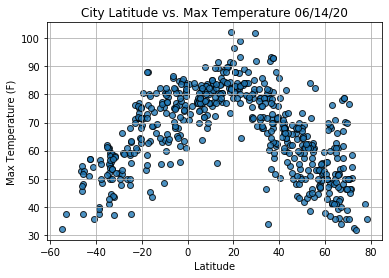

In [105]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

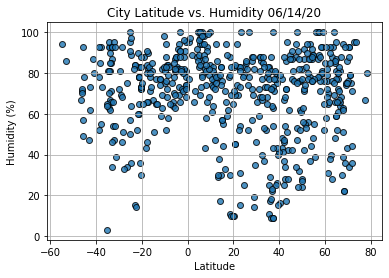

In [106]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

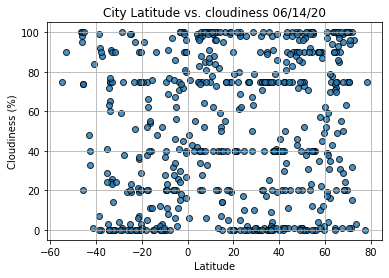

In [107]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

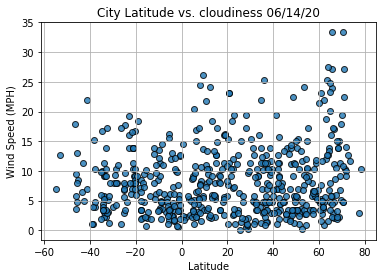

In [108]:
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# Linear Regression

In [116]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [117]:
# create a new DataFram from the current city_data_df

index13 = city_data_df.loc[13]
index13

City                     Cidreira
Country                        BR
Date          2020-06-14 23:35:46
Lat                        -30.18
Lng                        -50.21
Max Temp                    52.09
Humidity                       72
Cloudiness                      4
Wind Speed                   3.94
Name: 13, dtype: object

In [118]:
city_data_df["Lat"] >=0

0      False
1       True
2       True
3       True
4       True
       ...  
557     True
558     True
559    False
560     True
561     True
Name: Lat, Length: 562, dtype: bool

In [119]:
# Return a DataFrame with all data fitting the criter, for latitudes greather than or equal to 0

city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rawson,AR,2020-06-14 23:35:43,-43.30,-65.10,50.95,47,48,6.44
1,Hasaki,JP,2020-06-14 23:34:10,35.73,140.83,79.00,83,75,4.70
2,Caraballeda,VE,2020-06-14 23:35:44,10.61,-66.85,75.99,74,78,11.05
3,Ribeira Grande,PT,2020-06-14 23:35:44,38.52,-28.70,61.65,80,41,13.80
4,Batsfjord,NO,2020-06-14 23:35:44,70.63,29.72,50.00,93,75,4.70


In [120]:
# Assign this DataFrame to the variable northern_hemi_df
# Do the same with souther hemisphere latitudes

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


In [133]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
					   'Max Temp',(10,40))

TypeError: 'list' object is not callable

In [132]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

SyntaxError: EOL while scanning string literal (<ipython-input-132-8677a9d312d4>, line 6)